### ECE-GY 6123
### Nikita Makarov, Fall 2024

### Homework 2

Problem 1a:

In [150]:
from PIL import Image
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Create conv2 function
def conv2(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    '''
    Compute and return the same-padded 2D convolution of two matrices A and B.

    Parameters:
    A: 2D numpy array of the first matrix
    B: 2D numpy array of the second matrix

    Returns:
    C: 2D numpy array of the same-padded 2D convolution matrix
    '''

    # Calculate final shape of C and preallocate
    [ma, na] = np.shape(A)
    [mb, nb] = np.shape(B)
    mc = ma + mb - 1
    nc = na + nb - 1
    C = np.zeros([mc,nc])

    # Iterate over all elements in C
    for j in range(-1,mc):
        for k in range(-1,nc):
            for p in range(max(0, j+2-mb), min(ma, j+2), 1):
                for q in range(max(0, k+2-nb), min(na, k+2), 1):
                    C[j+1,k+1] = C[j+1,k+1] + (A[p,q] * B[j-p+1,k-q+1]) # Sum over p and q to compute convolution

    # Subset for 'same' padding
    mi = int(abs(mc-ma)/2) # Starting index for axis 1
    ni = int(abs(nc-na)/2) # Starting index for axis 2
    return C[mi:mi+ma,ni:ni+na]

Problem 1b:

In [151]:
# Create plot_filtering function
def plot_filtering(data: np.ndarray, filter: np.ndarray) -> None:
    '''
    Filter the given image using the given filter and plot the following:
    - Original image and filtered image
    - Log-magnitude spectrum of the original image, filter, and filtered image

    Parameters:
    data: 2D numpy array of the image data in grayscale
    filter: 2D numpy array of the filter matrix
    '''

    # Compute filtered image
    data_filter = conv2(data, filter)
    N = np.shape(data)[0]

    # Create figure for original image
    plt.figure()
    plt.imshow(data, interpolation='none', cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image')
    plt.axis('off')
    plt.colorbar()

    # Create figure for filtered image
    plt.figure()
    plt.imshow(data_filter, interpolation='none', cmap='gray', vmin=0, vmax=255)
    plt.title('Filtered Image')
    plt.axis('off')
    plt.colorbar()

    # Create frequency response of filter
    H = np.fft.fft2(filter,[N,N])
    plt.figure()
    plt.imshow(np.abs(H), interpolation='none', cmap='gray')
    plt.title('Frequency response of filter')
    plt.axis('off')
    plt.colorbar()

Problem 1c:

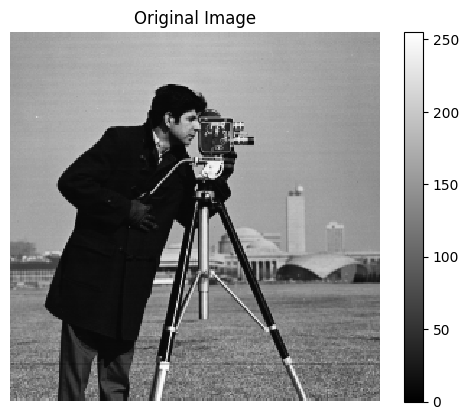

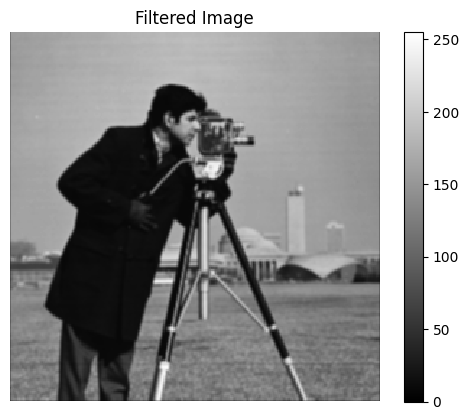

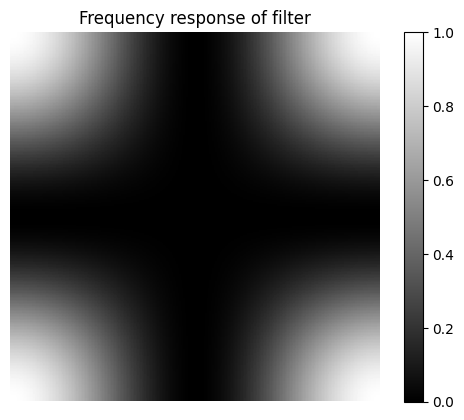

In [152]:
# Load sample grayscale image
img = Image.open('cameraman.tif')
img.load()
image_data = np.asarray(img) # Image is in grayscale with 8 bit depth

# Apply H1 filter to image
H1 = 1/16 * np.asarray([[1,2,1],[2,4,2],[1,2,1]]) # H1 filter matrix
plot_filtering(image_data,H1)

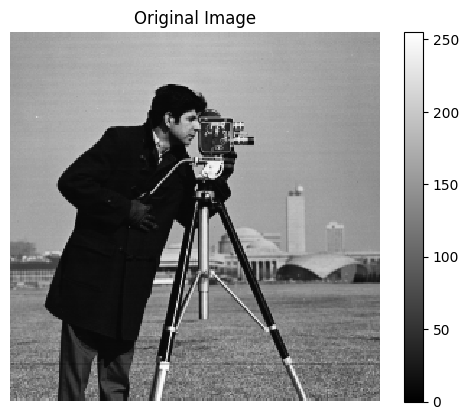

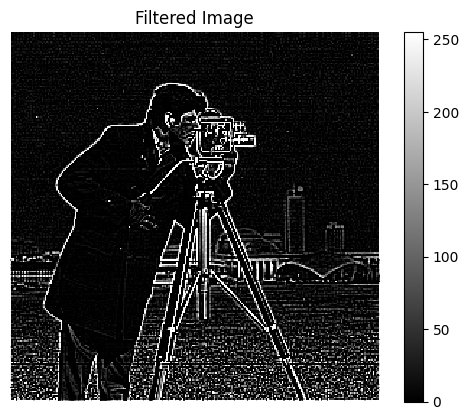

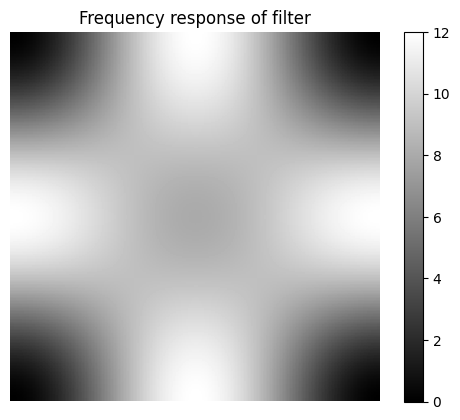

In [153]:
# Apply H2 filter to image
H2 = np.asarray([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # H2 filter matrix
plot_filtering(image_data,H2)

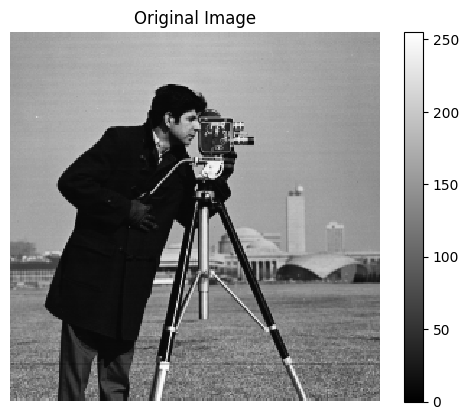

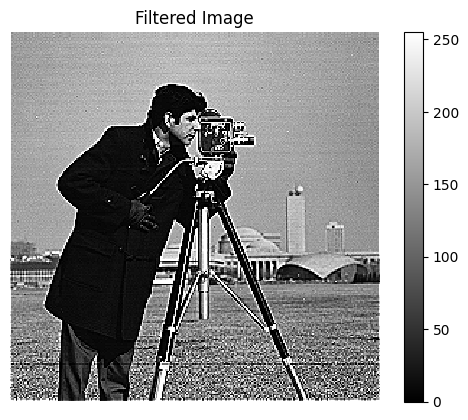

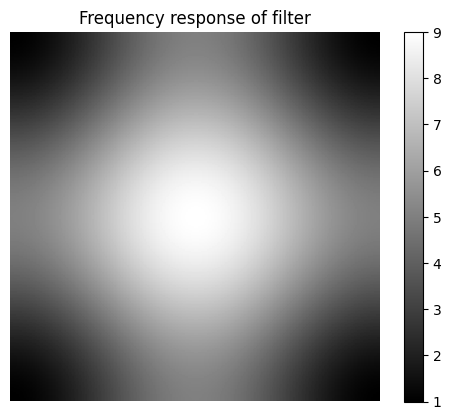

In [154]:
# Apply H3 filter to image
H3 = np.asarray([[0,-1,0],[-1,5,-1],[0,-1,0]]) # H3 filter matrix
plot_filtering(image_data,H3)